In [1]:
import pandas as pd

In [2]:
localurl='April_sensor_data.csv'
try:
    df = pd.read_csv(localurl)
except  OSError as err:
    print("OS error: {0}".format(err))
df.head()

,NO,REG_DATE,PM2.5,PM10.0,Temperature,Huminity,TVOC,CO2
0,1,2020-04-02 0:00,7.54,6.19,21.6,22.1,1.86,4.16
1,2,2020-04-02 0:01,7.83,6.19,21.6,22.1,1.85,4.15
2,3,2020-04-02 0:02,7.54,6.19,21.6,22.1,1.86,4.20
3,4,2020-04-02 0:03,7.83,6.19,21.5,22.1,1.81,4.17
4,5,2020-04-02 0:04,8.12,6.19,21.6,22.1,1.85,4.20


In [3]:
df.columns

Index(['NO', 'REG_DATE', 'PM2.5', 'PM10.0', 'Temperature', 'Huminity', 'TVOC',
       'CO2'],
      dtype='object')

In [4]:
df.drop('NO', axis=1, inplace=True)

In [5]:
df = df.rename(columns={'Huminity': 'Humidity', 'PM2.5' :'PM25', 'PM10.0':'PM100'})

In [6]:
pd.cut(df['Temperature'], bins=2)

0        (18.093, 21.65]
1        (18.093, 21.65]
2        (18.093, 21.65]
3        (18.093, 21.65]
4        (18.093, 21.65]
              ...       
25915    (18.093, 21.65]
25916    (18.093, 21.65]
25917    (18.093, 21.65]
25918    (18.093, 21.65]
25919    (18.093, 21.65]
Name: Temperature, Length: 25920, dtype: category
Categories (2, interval[float64]): [(18.093, 21.65] < (21.65, 25.2]]

In [7]:
df['Temperature'].nlargest(3)

683    25.2
680    25.1
681    25.1
Name: Temperature, dtype: float64

In [8]:
df['Temperature'].min() 

18.1

In [9]:
df['Temperature'].max()

25.2

In [10]:
df.nlargest(3, columns='Temperature')

,REG_DATE,PM25,PM100,Temperature,Humidity,TVOC,CO2
683,2020-04-02 11:23,11.03,12.38,25.2,19.6,2.58,4.49
680,2020-04-02 11:20,10.74,12.38,25.1,19.7,2.63,4.62
681,2020-04-02 11:21,10.16,12.38,25.1,19.5,2.58,4.54


In [11]:
df['Temperature'].nsmallest(3)

10671    18.1
10672    18.1
10669    18.2
Name: Temperature, dtype: float64

In [12]:
df.nsmallest(3, columns='Temperature')

,REG_DATE,PM25,PM100,Temperature,Humidity,TVOC,CO2
10671,2020-04-09 9:51,14.22,12.38,18.1,21.0,1.39,3.22
10672,2020-04-09 9:52,13.35,12.38,18.1,21.1,1.42,3.25
10669,2020-04-09 9:49,15.09,12.38,18.2,20.9,1.38,3.29


In [13]:
df['Temperature'].min()

18.1

In [14]:
df['Temperature'][df['Humidity']==df['Humidity'].min()]

5071    19.5
Name: Temperature, dtype: float64

In [15]:
df_temp = df['Temperature']

In [16]:
df_temp.describe()

count    25919.000000
mean        20.248779
std          1.054083
min         18.100000
25%         19.400000
50%         20.200000
75%         20.800000
max         25.200000
Name: Temperature, dtype: float64

In [17]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [18]:
df_1 = df.drop('REG_DATE', axis=1)

In [19]:
for x in df_1.columns:
    print(df_1[x].describe())
    

count    25920.000000
mean        13.863554
std          8.075783
min          1.480000
25%          8.700000
50%         12.190000
75%         16.730000
max         74.570000
Name: PM25, dtype: float64
count    25920.000000
mean        13.872682
std          7.598230
min          0.000000
25%          6.587500
50%         12.380000
75%         18.570000
max         61.900000
Name: PM100, dtype: float64
count    25919.000000
mean        20.248779
std          1.054083
min         18.100000
25%         19.400000
50%         20.200000
75%         20.800000
max         25.200000
Name: Temperature, dtype: float64
count    25919.000000
mean        26.715375
std          6.867535
min         13.300000
25%         22.300000
50%         25.500000
75%         30.500000
max         43.400000
Name: Humidity, dtype: float64
count    25919.000000
mean         2.026366
std          0.282825
min          1.100000
25%          1.840000
50%          2.010000
75%          2.160000
max          6.860000


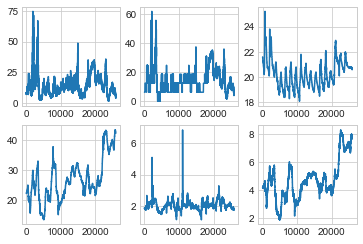

In [20]:
figure, axes = plt.subplots(nrows=2, ncols=3)
x  = list(range(len(df_1['Temperature'])))
axes[0, 0].plot(x, df_1['PM25'])
axes[0, 1].plot(x, df_1['PM100'])
axes[0, 2].plot(x, df_1['Temperature'])
axes[1, 0].plot(x, df_1['Humidity'])
axes[1, 1].plot(x, df_1['TVOC'])
axes[1, 2].plot(x, df_1['CO2'])



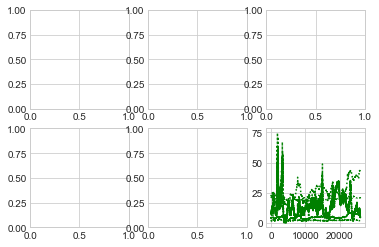

In [21]:
fig, ax = plt.subplots(nrows=2, ncols=3)
# Just a figure and one subplot
for xy in df_1.columns:
    x  = list(range(len(df_1[xy])))  
    plt.plot(x, df_1[xy], ':b', color='g')

In [22]:
x = list(range(len(df_temp)))

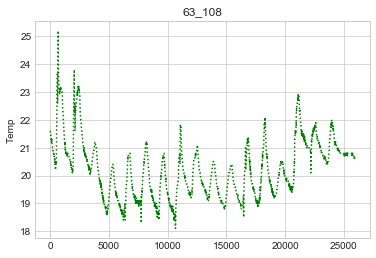

In [23]:
plt.plot(x, df_temp, ':b', color='g')
plt.xlim(0, 5)
plt.ylim(15, 50);
plt.axis('tight');
plt.title("63_108")
plt.ylabel("Temp");

plt.show()

In [24]:
df_temp.describe()

count    25919.000000
mean        20.248779
std          1.054083
min         18.100000
25%         19.400000
50%         20.200000
75%         20.800000
max         25.200000
Name: Temperature, dtype: float64

In [25]:
def z_score(df):
    return ((df - df.mean())/df.std(ddof=0))

In [26]:
z_score(df_temp)

0        1.281917
1        1.281917
2        1.281917
3        1.187046
4        1.281917
           ...   
25915    0.333207
25916    0.333207
25917    0.333207
25918    0.333207
25919    0.333207
Name: Temperature, Length: 25920, dtype: float64

In [27]:
import matplotlib.pyplot as plt
def plot_zscore(df):
    x = list(range(len(df_temp)))
    y = z_score(df_temp)
    plt.plot(x, y, ':b', color='g')
    plt.plot(x, df_temp, ':b', color='r')
    plt.show()

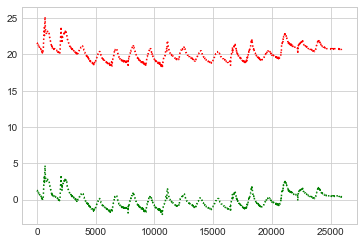

In [28]:
plot_zscore(df_temp)

/Users/kangyunhi/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/kangyunhi/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Users/kangyunhi/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/kangyunhi/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


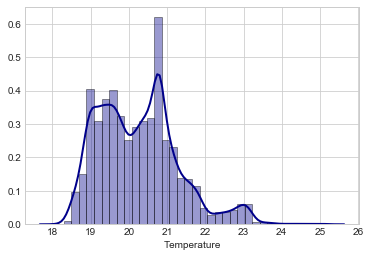

In [29]:
import seaborn as sns
sns.distplot(df_temp, hist=True, kde=True,
                 bins=int(180 / 5), color='darkblue',
                 hist_kws={'edgecolor': 'black'},
                 kde_kws={'linewidth': 2})
plt.show()

In [30]:
def find_outlier(df_1, df_temp, z_name):
    df_1[z_name] = z_score(df_temp)
    df_1[ z_name +"_is_outlier"] = df_1[z_name].apply(lambda x: x <= -2 or x >= 2)
    #print(df_1[df_1["is_outlier"]])

import numpy as np

find_outlier(df_1, df_temp, 'z_temp')
num =  np.sum(df_1['z_temp'+"is_outlier"] == True)
rate = num/len(df_1)
rate

In [31]:
import numpy as np

for x in df_1.columns:
    find_outlier(df_1, df_1[x], 'z_'+x)


In [32]:
df_1

,PM25,PM100,Temperature,Humidity,TVOC,CO2,z_PM25,z_PM25_is_outlier,z_PM100,z_PM100_is_outlier,z_Temperature,z_Temperature_is_outlier,z_Humidity,z_Humidity_is_outlier,z_TVOC,z_TVOC_is_outlier,z_CO2,z_CO2_is_outlier
0,7.54,6.19,21.6,22.1,1.86,4.16,-0.783042,False,-1.011134,False,1.281917,False,-0.672070,False,-0.588240,False,-0.397811,False
1,7.83,6.19,21.6,22.1,1.85,4.15,-0.747131,False,-1.011134,False,1.281917,False,-0.672070,False,-0.623598,False,-0.405055,False
2,7.54,6.19,21.6,22.1,1.86,4.20,-0.783042,False,-1.011134,False,1.281917,False,-0.672070,False,-0.588240,False,-0.368836,False
3,7.83,6.19,21.5,22.1,1.81,4.17,-0.747131,False,-1.011134,False,1.187046,False,-0.672070,False,-0.765031,False,-0.390567,False
4,8.12,6.19,21.6,22.1,1.85,4.20,-0.711221,False,-1.011134,False,1.281917,False,-0.672070,False,-0.623598,False,-0.368836,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25915,4.35,4.35,20.6,42.3,1.76,7.70,-1.178058,False,-1.253300,False,0.333207,False,2.269362,True,-0.941822,False,2.166501,True
25916,4.21,4.22,20.6,42.3,1.78,7.69,-1.195394,False,-1.270410,False,0.333207,False,2.269362,True,-0.871106,False,2.159257,True
25917,5.07,5.07,20.6,42.3,1.76,7.66,-1.088901,False,-1.158540,False,0.333207,False,2.269362,True,-0.941822,False,2.137525,True
25918,3.90,3.90,20.6,42.3,1.77,7.71,-1.233781,False,-1.312526,False,0.333207,False,2.269362,True,-0.906464,False,2.173744,True


In [40]:
columns = ['PM25','PM100','Temperature','Humidity','TVOC','CO2']
for x in columns: 
    num_x =  np.sum(df_1['z_'+ x + "_is_outlier"] == True)
    rate_x = num_x/len(df_1)
    print("{} = {}".format (x, rate_x))

PM25 = 0.05763888888888889
PM100 = 0.06512345679012346
Temperature = 0.047955246913580246
Humidity = 0.04938271604938271
TVOC = 0.04239969135802469
CO2 = 0.05563271604938272
